In [51]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [52]:
mydata=pd.read_csv('mydata.csv')

In [53]:
mydata

columns1 columns2 columns3
0         1        a        A
1         2        a        A
2         2        a        A
3         3        b        B
4         4        b        B
5         4        b        B

In [54]:
mydata.drop_duplicates()

columns1 columns2 columns3
0         1        a        A
1         2        a        A
3         3        b        B
4         4        b        B

In [55]:
my_source1=pd.read_csv('my_source1.csv')

In [56]:
my_source2=pd.read_csv('my_source2.csv')

In [57]:
my_source1

0  1   2   3   4
0  babak  1  13  17  17
1   raha  2  14  14  15
2   sara  3  17  12  20
3   reza  4  12  18  19

In [58]:
my_source2

0  1   2   3
0   babak  1  13  17
1   baran  2  15  20
2    sara  3  14  19
3   arash  4  20  19
4  mehran  5  15  18
5    reza  6  14  12

In [59]:
my_concat=pd.concat([my_source1,my_source2],axis=0,ignore_index=True)

In [60]:
my_concat

0  1   2   3     4
0   babak  1  13  17  17.0
1    raha  2  14  14  15.0
2    sara  3  17  12  20.0
3    reza  4  12  18  19.0
4   babak  1  13  17   NaN
5   baran  2  15  20   NaN
6    sara  3  14  19   NaN
7   arash  4  20  19   NaN
8  mehran  5  15  18   NaN
9    reza  6  14  12   NaN

In [61]:
my_concat.drop(['4'],axis=1,inplace=True)

In [62]:
my_concat

0  1   2   3
0   babak  1  13  17
1    raha  2  14  14
2    sara  3  17  12
3    reza  4  12  18
4   babak  1  13  17
5   baran  2  15  20
6    sara  3  14  19
7   arash  4  20  19
8  mehran  5  15  18
9    reza  6  14  12

In [63]:
my_concat.drop_duplicates(inplace=True)

In [64]:
my_concat

0  1   2   3
0   babak  1  13  17
1    raha  2  14  14
2    sara  3  17  12
3    reza  4  12  18
5   baran  2  15  20
6    sara  3  14  19
7   arash  4  20  19
8  mehran  5  15  18
9    reza  6  14  12

In [65]:
smartphones=pd.read_csv('smartphones.csv')

In [66]:
smartphones

Name        OS  Capacity  Ram  Weight    Company  inch
0         Galaxy S10   Android       128    8   163.0    Samsung   6.2
1          Lumia 950  windows         32    3   150.0  Microsoft   5.2
2        Xpreia 1 ll   Android       256    8   181.0       Sony   6.5
3          iphone 7        ios       128    2   138.0      Apple   4.7
4            U Ultra   Android        64    4   170.0        HTC   5.7
5          Galaxy S5   Android        16    2   145.0    Samsung   5.1
6  iphone 11 pro max       ios       256    4   226.0      Apple   6.5
7            Moto G5   Android        16    3   144.5   Motorola   5.0
8             Pixel    Android       128    4   143.0     Google   5.0

In [67]:
smartphones.describe()

Capacity       Ram      Weight      inch
count    9.000000  9.000000    9.000000  9.000000
mean   113.777778  4.222222  162.277778  5.544444
std     93.104481  2.279132   27.833333  0.698411
min     16.000000  2.000000  138.000000  4.700000
25%     32.000000  3.000000  144.500000  5.000000
50%    128.000000  4.000000  150.000000  5.200000
75%    128.000000  4.000000  170.000000  6.200000
max    256.000000  8.000000  226.000000  6.500000

In [68]:
smartphones.OS.value_counts()

OS
Android     6
ios         2
windows     1
Name: count, dtype: int64

In [69]:
smartphones.Company.value_counts()

Company
Samsung      2
Apple        2
Microsoft    1
Sony         1
HTC          1
Motorola     1
Google       1
Name: count, dtype: int64

In [70]:
cat_os=smartphones.groupby(smartphones['Company']).max()

In [74]:
# تعریف دیکشنری نگاشت
os_mapping = {
    'Android': 10,
    'ios': 20,
    'windows': 30
}
# تبدیل مقادیر کاتگوریکال به عددی دلخواه
smartphones['OS'] = smartphones['OS'].map(os_mapping)

print(smartphones)

                Name  OS  Capacity  Ram  Weight    Company  inch
0         Galaxy S10 NaN       128    8   163.0    Samsung   6.2
1          Lumia 950 NaN        32    3   150.0  Microsoft   5.2
2        Xpreia 1 ll NaN       256    8   181.0       Sony   6.5
3          iphone 7  NaN       128    2   138.0      Apple   4.7
4            U Ultra NaN        64    4   170.0        HTC   5.7
5          Galaxy S5 NaN        16    2   145.0    Samsung   5.1
6  iphone 11 pro max NaN       256    4   226.0      Apple   6.5
7            Moto G5 NaN        16    3   144.5   Motorola   5.0
8             Pixel  NaN       128    4   143.0     Google   5.0


In [75]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# ایجاد شیء MinMaxScaler
scaler = MinMaxScaler()

# نرمال‌سازی داده‌ها
smartphones['value_scaled'] = scaler.fit_transform(smartphones[['Weight']])

print(smartphones)

                Name  OS  Capacity  Ram  Weight    Company  inch  value_scaled
0         Galaxy S10 NaN       128    8   163.0    Samsung   6.2      0.284091
1          Lumia 950 NaN        32    3   150.0  Microsoft   5.2      0.136364
2        Xpreia 1 ll NaN       256    8   181.0       Sony   6.5      0.488636
3          iphone 7  NaN       128    2   138.0      Apple   4.7      0.000000
4            U Ultra NaN        64    4   170.0        HTC   5.7      0.363636
5          Galaxy S5 NaN        16    2   145.0    Samsung   5.1      0.079545
6  iphone 11 pro max NaN       256    4   226.0      Apple   6.5      1.000000
7            Moto G5 NaN        16    3   144.5   Motorola   5.0      0.073864
8             Pixel  NaN       128    4   143.0     Google   5.0      0.056818


In [ ]:
df=pd.DataFrame(np.array([1,2,3,4,10,27]))


In [ ]:
df.quantile(0.75)

0    8.5
Name: 0.75, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

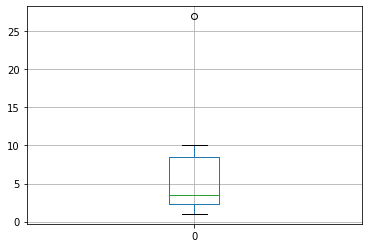

In [ ]:
df.boxplot()

تمرین ۱: مدیریت مقادیر گم‌شده
یک دیتافریم ایجاد کنید که شامل مقادیر گم‌شده (NaN) باشد.
مقادیر گم‌شده را با میانگین ستون مربوطه جایگزین کنید.
سپس، مقادیر گم‌شده را با مقدار صفر جایگزین کنید.

تمرین ۲: تبدیل داده‌های کاتگوریکال به عددی
یک دیتافریم حاوی ستون‌های کاتگوریکال (مانند رنگ‌ها یا دسته‌بندی‌ها) ایجاد کنید.
از Label Encoding برای تبدیل داده‌های کاتگوریکال به عددی استفاده کنید.
سپس، از One-Hot Encoding برای تبدیل داده‌های کاتگوریکال به بردارهای باینری استفاده کنید.

تمرین ۳: استانداردسازی داده‌ها
یک دیتافریم حاوی مقادیر عددی ایجاد کنید.

Min-Max Scaling برای نرمال‌سازی داده‌ها در بازه‌ی [۰, ۱] استفاده کنید.
سپس، از Z-Score Standardization برای استانداردسازی داده‌ها استفاده کنید.

تمرین ۴: تشخیص و حذف داده‌های پرت
یک دیتافریم حاوی مقادیر عددی با داده‌های پرت ایجاد کنید.
از روش IQR (Interquartile Range) برای تشخیص داده‌های پرت استفاده کنید.
داده‌های پرت را حذف کنید.
